<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


57.74439530057312


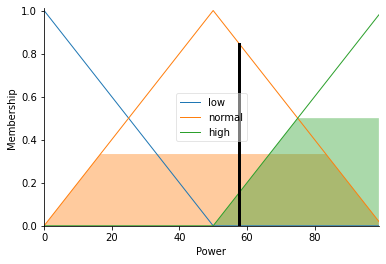

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Nồi cơm điện
time = ctrl.Antecedent(np.arange(10,180,1), 'Time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'Rice')
power = ctrl.Consequent(np.arange(0,100,1), 'Power')
# tao ham cho tung member
time['veryfast'] = fuzz.trimf(time.universe, [10,10,30])
time['fast'] = fuzz.trimf(time.universe, [30,60,90])
time['normal'] = fuzz.trimf(time.universe, [60,90,120])
time['slow'] = fuzz.trimf(time.universe, [120,150,180])
time['veryslow'] = fuzz.trimf(time.universe, [150,180,180])


rice['less'] = fuzz.trimf(rice.universe, [200,200,500])
rice['normal'] = fuzz.trimf(rice.universe, [200,500,1000])
rice['much'] = fuzz.trimf(rice.universe, [500,1000,1000])


power['low']= fuzz.trimf(power.universe,[0,0,50])
power['normal']= fuzz.trimf(power.universe,[0,50,100])
power['high']= fuzz.trimf(power.universe,[50,100,100])

rule1 = ctrl.Rule(time['veryfast'] & rice['less'], power['normal'])
rule2 = ctrl.Rule(time['veryfast'] & rice['normal'], power['high'])
rule3= ctrl.Rule(time['veryfast'] & rice['much'], power['high'])


rule4 = ctrl.Rule(time['fast'] & rice['less'], power['normal'])
rule5 = ctrl.Rule(time['fast'] & rice['normal'], power['normal'])
rule6 = ctrl.Rule(time['fast'] & rice['much'], power['high'])


rule7 = ctrl.Rule(time['normal'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time['normal'] & rice['normal'], power['normal'])
rule9 = ctrl.Rule(time['normal'] & rice['much'], power['normal'])

rule10 = ctrl.Rule(time['slow'] & rice['less'], power['low'])
rule11 = ctrl.Rule(time['slow'] & rice['normal'], power['low'])
rule12 = ctrl.Rule(time['slow'] & rice['much'], power['normal'])

rule13 = ctrl.Rule(time['veryslow'] & rice['less'], power['low'])
rule14 = ctrl.Rule(time['veryslow'] & rice['normal'], power['low'])
rule15 = ctrl.Rule(time['veryslow'] & rice['much'], power['low'])

powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 20
powering.input['Rice'] = 400
powering.compute()
print(powering.output['Power'])
power.view(sim=powering)

19.999999999999996


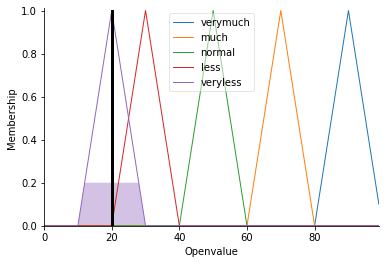

In [38]:
# Bồn nước

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

flow = ctrl.Antecedent(np.arange(0,5,0.1), 'Flow')
level = ctrl.Antecedent(np.arange(-10,10,0.1), 'Level')
openvalue = ctrl.Consequent(np.arange(0,100,1), 'Openvalue')
# tao ham cho tung member
flow['veryfast'] = fuzz.trimf(flow.universe, [4,5,5])
flow['fast'] = fuzz.trimf(flow.universe, [3,4,5])
flow['normal'] = fuzz.trimf(flow.universe, [2,3,4])
flow['slow'] = fuzz.trimf(flow.universe, [1,2,3])
flow['veryslow'] = fuzz.trimf(flow.universe, [0,0,1])


level['less'] = fuzz.trimf(level.universe, [-10,-10,0])
level['normal'] = fuzz.trimf(level.universe, [-0.1,0,0.1])
level['much'] = fuzz.trimf(level.universe, [0,10,10])


openvalue['verymuch'] = fuzz.trimf(openvalue.universe, [80,90,100])
openvalue['much'] = fuzz.trimf(openvalue.universe, [60,70,80])
openvalue['normal'] = fuzz.trimf(openvalue.universe, [40,50,60])
openvalue['less'] = fuzz.trimf(openvalue.universe, [20,30,40])
openvalue['veryless'] = fuzz.trimf(openvalue.universe, [10,20,30])

rule1 = ctrl.Rule(flow['veryfast'] & level['less'], openvalue['veryless'])
rule2 = ctrl.Rule(flow['veryfast'] & level['normal'], openvalue['much'])
rule3 = ctrl.Rule(flow['veryfast'] & level['much'], openvalue['verymuch'])

rule4 = ctrl.Rule(flow['fast'] & level['less'], openvalue['less'])
rule5 = ctrl.Rule(flow['fast'] & level['normal'], openvalue['much'])
rule6 = ctrl.Rule(flow['fast'] & level['much'], openvalue['veryless'])

rule7 = ctrl.Rule(flow['normal'] & level['less'], openvalue['less'])
rule8 = ctrl.Rule(flow['normal'] & level['normal'], openvalue['normal'])
rule9 = ctrl.Rule(flow['normal'] & level['much'], openvalue['much'])

rule7 = ctrl.Rule(flow['slow'] & level['less'], openvalue['veryless'])
rule8 = ctrl.Rule(flow['slow'] & level['normal'], openvalue['less'])
rule9 = ctrl.Rule(flow['slow'] & level['much'], openvalue['much'])

rule10 = ctrl.Rule(flow['veryslow'] & level['less'], openvalue['veryless'])
rule11 = ctrl.Rule(flow['veryslow'] & level['normal'], openvalue['less'])
rule12 = ctrl.Rule(flow['veryslow'] & level['much'], openvalue['verymuch'])

openvalueing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
openvalueing = ctrl.ControlSystemSimulation(openvalueing_ctrl)
openvalueing.input['Flow'] = 3.2
openvalueing.input['Level'] = 2
openvalueing.compute()
print(openvalueing.output['Openvalue'])
openvalue.view(sim=openvalueing)

0.2


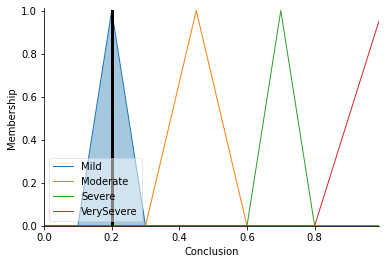

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fever = ctrl.Antecedent(np.arange(0,1,0.01), 'Fever')
headache = ctrl.Antecedent(np.arange(0,1,0.01), 'Headache')
nausea = ctrl.Antecedent(np.arange(0,1,0.01), 'Nausea')
vomiting = ctrl.Antecedent(np.arange(0,1,0.01), 'Vomiting')
jaundice = ctrl.Antecedent(np.arange(0,1,0.01), 'Jaundice')
enlargeLiver = ctrl.Antecedent(np.arange(0,1,0.01), 'EnlargeLiver')
jointPain = ctrl.Antecedent(np.arange(0,1,0.01), 'JointPain')
bodyWeakness = ctrl.Antecedent(np.arange(0,1,0.01), 'BodyWeakness')
dizziness = ctrl.Antecedent(np.arange(0,1,0.01), 'Dizziness')
lossofAppetite = ctrl.Antecedent(np.arange(0,1,0.01), 'LossofAppetite')
mp = ctrl.Antecedent(np.arange(0,1,0.01), 'MP')
conclusion = ctrl.Consequent(np.arange(0,1,0.01), 'Conclusion')
# tao ham cho tung member
fever['Mild'] = fuzz.trimf(fever.universe, [0.1,0.2,0.3])
fever['Moderate'] = fuzz.trimf(fever.universe, [0.3,0.45,0.6])
fever['Severe'] = fuzz.trimf(fever.universe, [0.5,0.7,0.8])
fever['VerySevere'] = fuzz.trimf(fever.universe, [0.8,1,1])

headache['Mild'] = fuzz.trimf(headache.universe, [0.1,0.2,0.3])
headache['Moderate'] = fuzz.trimf(headache.universe, [0.3,0.45,0.6])
headache['Severe'] = fuzz.trimf(headache.universe, [0.6,0.7,0.8])
headache['VerySevere'] = fuzz.trimf(headache.universe, [0.8,1,1])

nausea['Mild'] = fuzz.trimf(nausea.universe, [0.1,0.2,0.3])
nausea['Moderate'] = fuzz.trimf(nausea.universe, [0.3,0.45,0.6])
nausea['Severe'] = fuzz.trimf(nausea.universe, [0.6,0.7,0.8])
nausea['VerySevere'] = fuzz.trimf(nausea.universe, [0.8,1,1])

vomiting['Mild'] = fuzz.trimf(vomiting.universe, [0.1,0.2,0.3])
vomiting['Moderate'] = fuzz.trimf(vomiting.universe, [0.3,0.45,0.6])
vomiting['Severe'] = fuzz.trimf(vomiting.universe, [0.6,0.7,0.8])
vomiting['VerySevere'] = fuzz.trimf(vomiting.universe, [0.8,1,1])

jaundice['Mild'] = fuzz.trimf(jaundice.universe, [0.1,0.2,0.3])
jaundice['Moderate'] = fuzz.trimf(jaundice.universe, [0.3,0.45,0.6])
jaundice['Severe'] = fuzz.trimf(jaundice.universe, [0.6,0.7,0.8])
jaundice['VerySevere'] = fuzz.trimf(jaundice.universe, [0.8,1,1])

enlargeLiver['Mild'] = fuzz.trimf(enlargeLiver.universe, [0.1,0.2,0.3])
enlargeLiver['Moderate'] = fuzz.trimf(enlargeLiver.universe, [0.3,0.45,0.6])
enlargeLiver['Severe'] = fuzz.trimf(enlargeLiver.universe, [0.6,0.7,0.8])
enlargeLiver['VerySevere'] = fuzz.trimf(enlargeLiver.universe, [0.8,1,1])

jointPain['Mild'] = fuzz.trimf(jointPain.universe, [0.1,0.2,0.3])
jointPain['Moderate'] = fuzz.trimf(jointPain.universe, [0.3,0.45,0.6])
jointPain['Severe'] = fuzz.trimf(jointPain.universe, [0.6,0.7,0.8])
jointPain['VerySevere'] = fuzz.trimf(jointPain.universe, [0.8,1,1])

bodyWeakness['Mild'] = fuzz.trimf(bodyWeakness.universe, [0.1,0.2,0.3])
bodyWeakness['Moderate'] = fuzz.trimf(bodyWeakness.universe, [0.3,0.45,0.6])
bodyWeakness['Severe'] = fuzz.trimf(bodyWeakness.universe, [0.6,0.7,0.8])
bodyWeakness['VerySevere'] = fuzz.trimf(bodyWeakness.universe, [0.8,1,1])

dizziness['Mild'] = fuzz.trimf(dizziness.universe, [0.1,0.2,0.3])
dizziness['Moderate'] = fuzz.trimf(dizziness.universe, [0.3,0.45,0.6])
dizziness['Severe'] = fuzz.trimf(dizziness.universe, [0.6,0.7,0.8])
dizziness['VerySevere'] = fuzz.trimf(dizziness.universe, [0.8,1,1])

lossofAppetite['Mild'] = fuzz.trimf(lossofAppetite.universe, [0.1,0.2,0.3])
lossofAppetite['Moderate'] = fuzz.trimf(lossofAppetite.universe, [0.3,0.45,0.6])
lossofAppetite['Severe'] = fuzz.trimf(lossofAppetite.universe, [0.6,0.7,0.8])
lossofAppetite['VerySevere'] = fuzz.trimf(lossofAppetite.universe, [0.8,1,1])

mp['Mild'] = fuzz.trimf(mp.universe, [0.1,0.2,0.3])
mp['Moderate'] = fuzz.trimf(mp.universe, [0.3,0.45,0.6])
mp['Severe'] = fuzz.trimf(mp.universe, [0.6,0.7,0.8])
mp['VerySevere'] = fuzz.trimf(mp.universe, [0.8,1,1])

conclusion['Mild'] = fuzz.trimf(conclusion.universe, [0.1,0.2,0.3])
conclusion['Moderate'] = fuzz.trimf(conclusion.universe, [0.3,0.45,0.6])
conclusion['Severe'] = fuzz.trimf(conclusion.universe, [0.6,0.7,0.8])
conclusion['VerySevere'] = fuzz.trimf(conclusion.universe, [0.8,1,1])

rule1 = ctrl.Rule(fever['Mild'] & headache['Mild'] & nausea['Mild'] & vomiting['Mild'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Mild'] & bodyWeakness['Mild'] & dizziness['Severe'] & lossofAppetite['Mild'] & mp['Mild'], conclusion['Mild'])
rule2 = ctrl.Rule(fever['Moderate'] & headache['Mild'] & nausea['Mild'] & vomiting['Mild'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Moderate'] & bodyWeakness['Moderate'] & dizziness['Severe'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['Moderate'])
rule3 = ctrl.Rule(fever['Severe'] & headache['Moderate'] & nausea['Mild'] & vomiting['Mild'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Mild'] & bodyWeakness['Severe'] & dizziness['Severe'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['Severe'])
rule4 = ctrl.Rule(fever['VerySevere'] & headache['Mild'] & nausea['Mild'] & vomiting['Mild'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Severe'] & bodyWeakness['Severe'] & dizziness['Mild'] & lossofAppetite['Mild'] & mp['Severe'], conclusion['VerySevere'])
rule5 = ctrl.Rule(fever['Moderate'] & headache['Mild'] & nausea['Mild'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Moderate'] & bodyWeakness['Moderate'] & dizziness['Moderate'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['Moderate'])
rule6 = ctrl.Rule(fever['Mild'] & headache['Moderate'] & nausea['Moderate'] & vomiting['Mild'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Mild'] & bodyWeakness['Mild'] & dizziness['Moderate'] & lossofAppetite['Mild'] & mp['Mild'], conclusion['Mild'])
rule7 = ctrl.Rule(fever['Mild'] & headache['Mild'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Severe'] & bodyWeakness['Severe'] & dizziness['Moderate'] & lossofAppetite['Moderate'] & mp['Moderate'], conclusion['Severe'])
rule8 = ctrl.Rule(fever['Moderate'] & headache['Moderate'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Moderate'] & enlargeLiver['Moderate'] & jointPain['Moderate'] & bodyWeakness['Moderate'] & dizziness['Moderate'] & lossofAppetite['Moderate'] & mp['Moderate'], conclusion['Moderate'])
rule9 = ctrl.Rule(fever['Moderate'] & headache['Mild'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Severe'] & jointPain['Moderate'] & bodyWeakness['Moderate'] & dizziness['Severe'] & lossofAppetite['Moderate'] & mp['Moderate'], conclusion['Moderate'])
rule10 = ctrl.Rule(fever['Mild'] & headache['Mild'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Moderate'] & jointPain['Mild'] & bodyWeakness['Mild'] & dizziness['Mild'] & lossofAppetite['Mild'] & mp['Mild'], conclusion['Mild'])
rule11 = ctrl.Rule(fever['Severe'] & headache['Severe'] & nausea['Severe'] & vomiting['Severe'] & jaundice['Severe'] & enlargeLiver['Severe'] & jointPain['Severe'] & bodyWeakness['VerySevere'] & dizziness['Severe'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['VerySevere'])
rule12 = ctrl.Rule(fever['Moderate'] & headache['Severe'] & nausea['Moderate'] & vomiting['Severe'] & jaundice['Moderate'] & enlargeLiver['Severe'] & jointPain['Moderate'] & bodyWeakness['Severe'] & dizziness['Moderate'] & lossofAppetite['Mild'] & mp['Moderate'], conclusion['Severe'])
rule13 = ctrl.Rule(fever['Mild'] & headache['Moderate'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Mild'] & bodyWeakness['Moderate'] & dizziness['Mild'] & lossofAppetite['Moderate'] & mp['Moderate'], conclusion['Moderate'])
rule14 = ctrl.Rule(fever['Severe'] & headache['Severe'] & nausea['Moderate'] & vomiting['Severe'] & jaundice['Severe'] & enlargeLiver['Severe'] & jointPain['Severe'] & bodyWeakness['Severe'] & dizziness['Moderate'] & lossofAppetite['Moderate'] & mp['Severe'], conclusion['Severe'])
rule15 = ctrl.Rule(fever['Mild'] & headache['Mild'] & nausea['Mild'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Mild'] & bodyWeakness['Severe'] & dizziness['Mild'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['Severe'])
rule16 = ctrl.Rule(fever['VerySevere'] & headache['Moderate'] & nausea['Mild'] & vomiting['Moderate'] & jaundice['Severe'] & enlargeLiver['Moderate'] & jointPain['Mild'] & bodyWeakness['VerySevere'] & dizziness['Severe'] & lossofAppetite['Mild'] & mp['Moderate'], conclusion['VerySevere'])
rule17 = ctrl.Rule(fever['Mild'] & headache['VerySevere'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Moderate'] & jointPain['Mild'] & bodyWeakness['Moderate'] & dizziness['VerySevere'] & lossofAppetite['Mild'] & mp['Moderate'], conclusion['VerySevere'])
rule18 = ctrl.Rule(fever['Moderate'] & headache['VerySevere'] & nausea['VerySevere'] & vomiting['Mild'] & jaundice['Severe'] & enlargeLiver['Severe'] & jointPain['Moderate'] & bodyWeakness['Severe'] & dizziness['VerySevere'] & lossofAppetite['VerySevere'] & mp['Severe'], conclusion['VerySevere'])
rule19 = ctrl.Rule(fever['Moderate'] & headache['Moderate'] & nausea['Moderate'] & vomiting['Moderate'] & jaundice['Mild'] & enlargeLiver['Mild'] & jointPain['Moderate'] & bodyWeakness['Moderate'] & dizziness['Moderate'] & lossofAppetite['Moderate'] & mp['Moderate'], conclusion['Moderate'])
rule20 = ctrl.Rule(fever['VerySevere'] & headache['Severe'] & nausea['Severe'] & vomiting['Severe'] & jaundice['Severe'] & enlargeLiver['Severe'] & jointPain['Severe'] & bodyWeakness['Severe'] & dizziness['Severe'] & lossofAppetite['Severe'] & mp['Moderate'], conclusion['VerySevere'])

conclusioning_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
conclusioning = ctrl.ControlSystemSimulation(conclusioning_ctrl)

conclusioning.input['Fever'] = 0.2
conclusioning.input['Headache'] = 0.2
conclusioning.input['Nausea'] = 0.2
conclusioning.input['Vomiting'] = 0.2
conclusioning.input['Jaundice'] = 0.2
conclusioning.input['EnlargeLiver'] = 0.2
conclusioning.input['JointPain'] = 0.2
conclusioning.input['BodyWeakness'] = 0.2
conclusioning.input['Dizziness'] = 0.7
conclusioning.input['LossofAppetite'] = 0.2
conclusioning.input['MP'] = 0.2

conclusioning.compute()
print(conclusioning.output['Conclusion'])
conclusion.view(sim=conclusioning)

1.2293002136752078


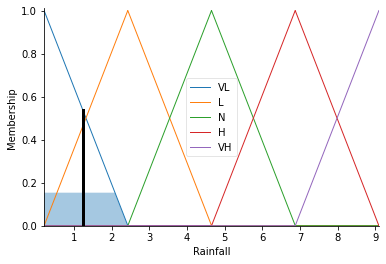

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

windspeed = ctrl.Antecedent(np.arange(0.7,3.1,0.01), 'Windspeed')
temperatureC = ctrl.Antecedent(np.arange(20.4,41.2,0.01), 'TemperatureC')
rainfall = ctrl.Consequent(np.arange(0.2,9.1,0.001), 'Rainfall')
# tao ham cho tung member
windspeed['VL'] = fuzz.trimf(windspeed.universe, [0.7,0.7,1.3])
windspeed['L'] = fuzz.trimf(windspeed.universe, [0.7,1.3,1.9])
windspeed['N'] = fuzz.trimf(windspeed.universe, [1.3,1.9,2.5])
windspeed['H'] = fuzz.trimf(windspeed.universe, [1.9,2.5,3.1])
windspeed['VH'] = fuzz.trimf(windspeed.universe, [2.5,3.1,3.1])

temperatureC['VL'] = fuzz.trimf(temperatureC.universe, [20.4,20.4,25.6])
temperatureC['L'] = fuzz.trimf(temperatureC.universe, [20.4,25.6,30.8])
temperatureC['N'] = fuzz.trimf(temperatureC.universe, [25.6,30.8,36])
temperatureC['H'] = fuzz.trimf(temperatureC.universe, [30.8,36,41.2])
temperatureC['VH'] = fuzz.trimf(temperatureC.universe, [36,41.2,41.2])

rainfall['VL'] = fuzz.trimf(rainfall.universe, [0.2,0.2,2.425])
rainfall['L'] = fuzz.trimf(rainfall.universe, [0.2,2.425,4.65])
rainfall['N'] = fuzz.trimf(rainfall.universe, [2.425,4.65,6.875])
rainfall['H'] = fuzz.trimf(rainfall.universe, [4.65,6.875,9.1])
rainfall['VH'] = fuzz.trimf(rainfall.universe, [6.875,9.1,9.1])


rule1 = ctrl.Rule(windspeed['VL'] & temperatureC['VL'], rainfall['VL'])
rule2 = ctrl.Rule(windspeed['L'] & temperatureC['L'], rainfall['VL'])
rule3 = ctrl.Rule(windspeed['VH'] & temperatureC['VH'], rainfall['VH'])

rule4 = ctrl.Rule(windspeed['L'] & temperatureC['VL'], rainfall['VL'])
rule5 = ctrl.Rule(windspeed['H'] & temperatureC['VH'], rainfall['H'])
rule6 = ctrl.Rule(windspeed['VH'] & temperatureC['N'], rainfall['H'])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['Windspeed'] = 1.2
rainfalling.input['TemperatureC'] = 30
rainfalling.compute()
print(rainfalling.output['Rainfall'])
rainfall.view(sim=rainfalling)